In [1]:
#Import packages
import bamboolib as bam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Import dataset
passenger = pd.read_csv(r"C:\Local\ALY6040_Data Mining\Week 2\train.csv")
passenger

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
passenger.shape

(891, 12)

In [4]:
passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#missing value check
missing_perc = round(passenger.isnull().mean() * 100,3)

# print the results
for column_name, percentage in missing_perc.items():
    print(f"{column_name}: {percentage:.2f}%")

PassengerId: 0.00%
Survived: 0.00%
Pclass: 0.00%
Name: 0.00%
Sex: 0.00%
Age: 19.86%
SibSp: 0.00%
Parch: 0.00%
Ticket: 0.00%
Fare: 0.00%
Cabin: 77.10%
Embarked: 0.22%


In [6]:
#creating dataframe copy 
pass_df = passenger.copy()
pass_df

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [7]:
#Dropping column -'Cabin'
pass_df = pass_df.drop("Cabin",axis=1)

In [8]:
#Replacing null values in column - 'Embarked'
pass_df['Embarked'].fillna(pass_df['Embarked'].mode()[0], inplace=True)

In [9]:
#performing numerical analysis on 'Horsepower'
pass_df['Age'].describe([0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.99,1])

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
80%       41.000000
85%       45.000000
90%       50.000000
95%       56.000000
99%       65.870000
100%      80.000000
max       80.000000
Name: Age, dtype: float64

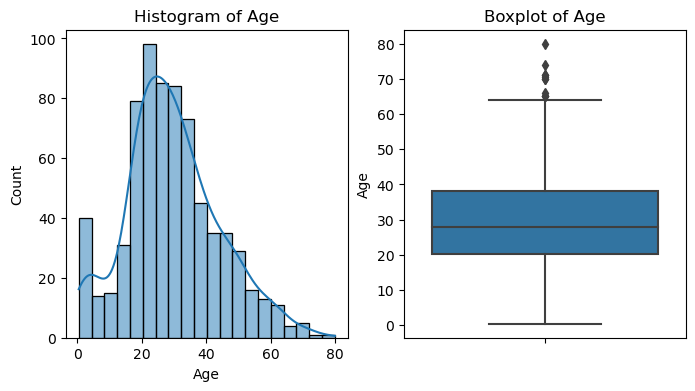

In [10]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
sns.histplot(data=pass_df, x='Age', kde=True, bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')

plt.subplot(1, 2, 2)
sns.boxplot(data=pass_df, y='Age')
plt.ylabel('Age')
plt.title('Boxplot of Age')

plt.show()

In [11]:
#imputing median for na values 
age_med = pass_df["Age"].median()
pass_df["Age"].fillna(age_med, inplace = True)

In [12]:
# Round off the age to the nearest whole number
pass_df['Age'] = round(pass_df['Age'])

# Convert the age column to integer data type
pass_df['Age'] = pass_df['Age'].astype(int)

In [13]:
# create the new column 'Family Size'
pass_df['Family Size'] = pass_df['SibSp'] + pass_df['Parch'] + 1

In [14]:
# map 'male' to 0 and 'female' to 1
pass_df['Sex'] = pass_df['Sex'].map({'male': 0, 'female': 1})

In [15]:
#missing value check
missing_perc = round(pass_df.isnull().mean() * 100,3)

# print the results
for column_name, percentage in missing_perc.items():
    print(f"{column_name}: {percentage:.2f}%")

PassengerId: 0.00%
Survived: 0.00%
Pclass: 0.00%
Name: 0.00%
Sex: 0.00%
Age: 0.00%
SibSp: 0.00%
Parch: 0.00%
Ticket: 0.00%
Fare: 0.00%
Embarked: 0.00%
Family Size: 0.00%


In [16]:
#Duplicate value check
pass_df.duplicated().sum()

0

In [17]:
num_cols = pass_df.select_dtypes(include=['int64', 'float64','int'])
num_cols_df = num_cols.copy()
# remove passengerId from dataset
num_cols.drop(["PassengerId","Survived","Sex"],axis=1,inplace=True)

In [18]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Age          891 non-null    int32  
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Family Size  891 non-null    int64  
dtypes: float64(1), int32(1), int64(4)
memory usage: 38.4 KB


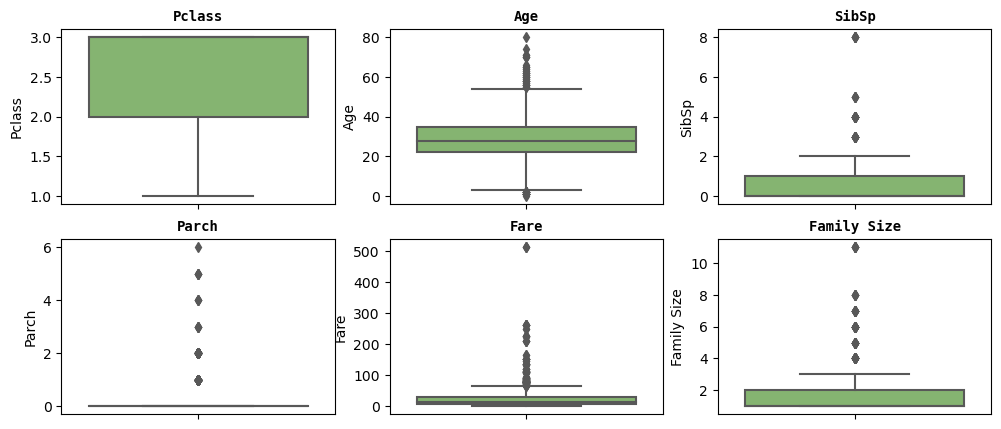

In [19]:
fig, ax = plt.subplots(2, 3, figsize = (12, 5))
for i, col in enumerate(num_cols.columns):
    g = sns.boxplot(data = num_cols, y = col, ax = ax[i // 3, i % 3], palette = "summer")
    g.set_title(col, weight = "bold", fontsize = 10, fontname = "monospace")

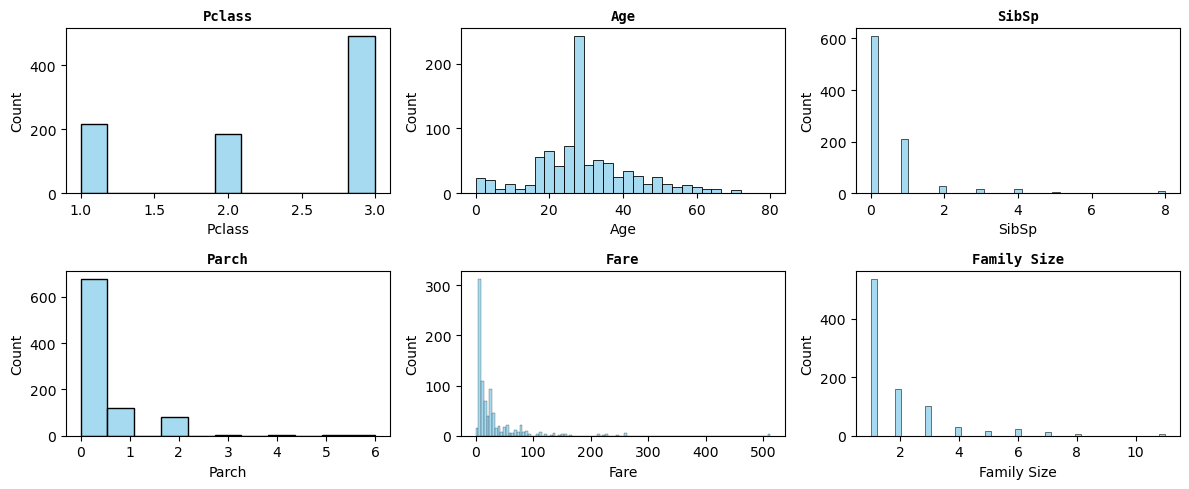

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(12, 5))
for i, col in enumerate(num_cols.columns):
    g = sns.histplot(data=num_cols, x=col, ax=ax[i//3, i%3], color="skyblue")
    g.set_title(col, weight="bold", fontsize=10, fontname="monospace")
plt.tight_layout()
plt.show()

In [22]:
#get title
pass_df["Title"] = pass_df["Name"].apply( lambda x : x.split(",")[1].split(".")[0].strip())

In [23]:
pass_df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   38      1      0   
2                             Heikkinen, Miss. Laina    1   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   35      1      0   
4                           Allen, Mr. William Henry    0   35      0      0   

             Ticket     Fare Embarked  Family Size Title  
0         A/5 21171   7.2500        S            2    Mr  
1          PC 17599  71.2833        C            2   Mrs  
2  STON/O2. 3101282   7.9250        S            1  Miss  
3            113803  53.1000        S            2   Mrs  
4      

In [24]:
pass_df = pd.get_dummies(pass_df, columns=['Title','Embarked'], drop_first=True, dummy_na=False)
pass_df

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    0   22      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1   38      1   
2                               Heikkinen, Miss. Laina    1   26      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   35      1   
4                             Allen, Mr. William Henry    0   35      0   
..                                                 ...  ...  ...    ...   
886               

In [25]:
pass_df_final = pass_df.copy()

In [26]:
pass_df_final.drop(["PassengerId","Name","Ticket","SibSp","Parch"],axis=1,inplace=True)

Text(0.5, 1.0, 'Heatmap of correlation')

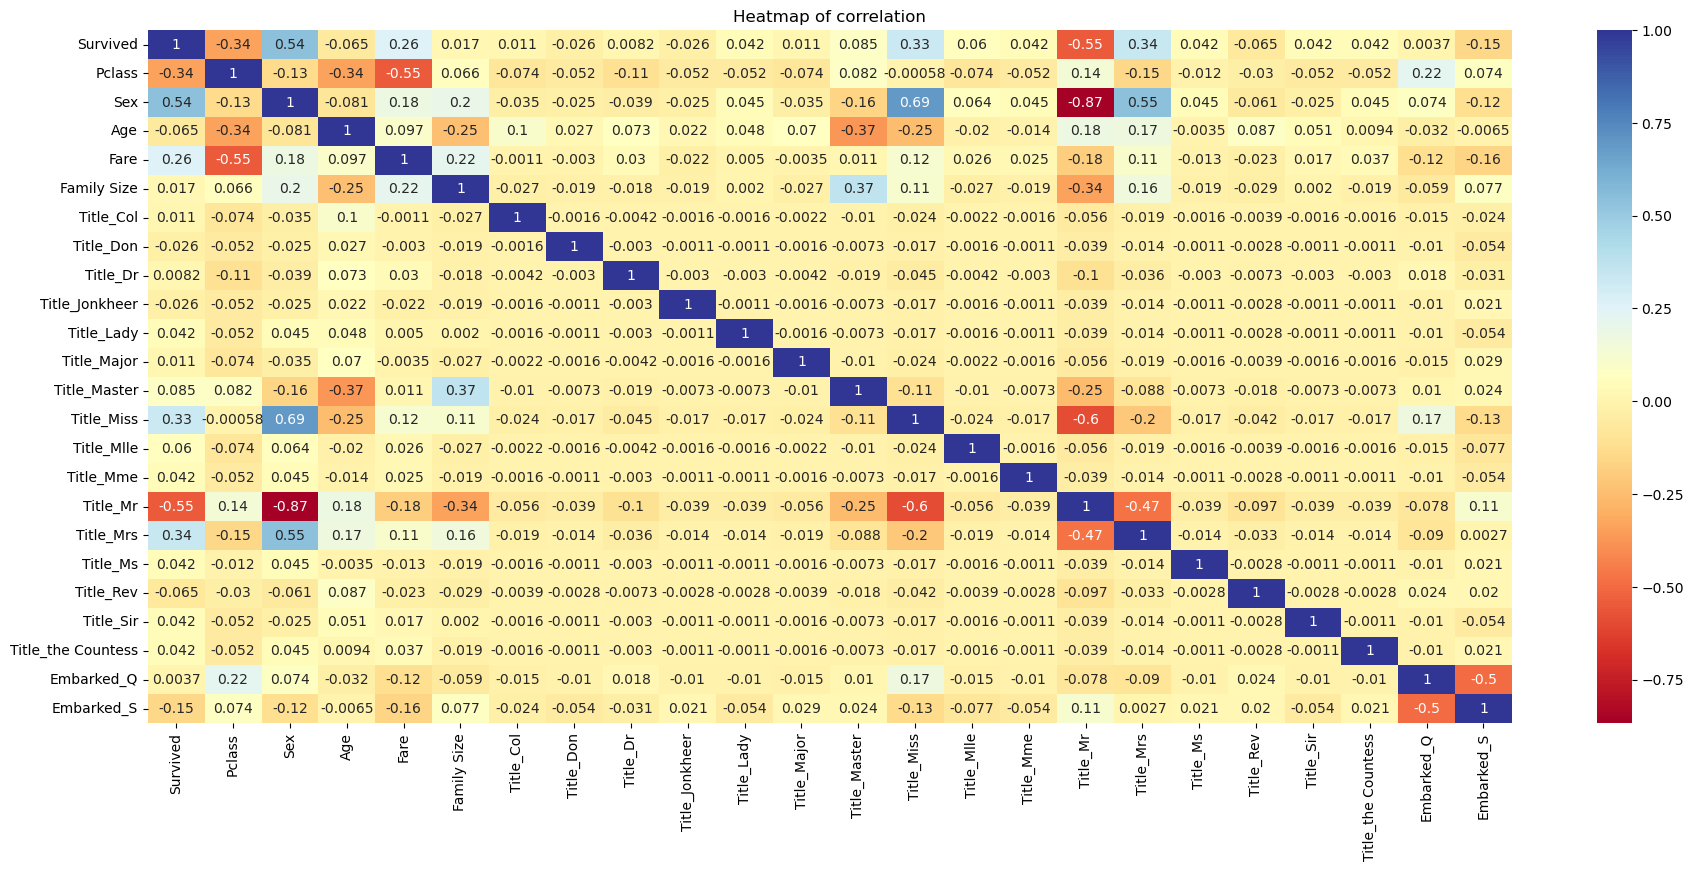

In [27]:
plt.figure(figsize=(22,9))
sns.heatmap(pass_df_final.corr(), cmap="RdYlBu",annot=True);
plt.title('Heatmap of correlation')

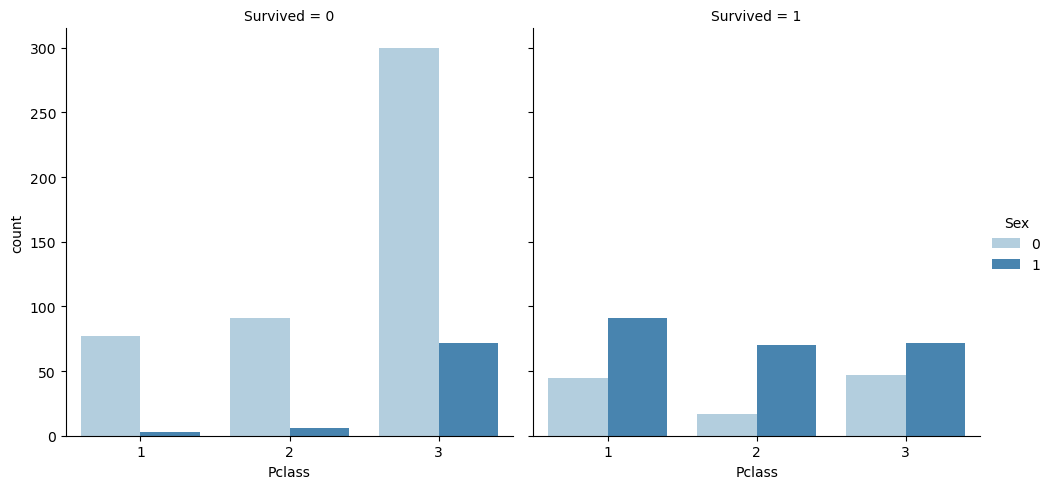

In [29]:
#displaying survical count based on Sex
sns.catplot(data=num_cols_df,x="Pclass",col='Survived',kind="count",palette="Blues",hue="Sex")

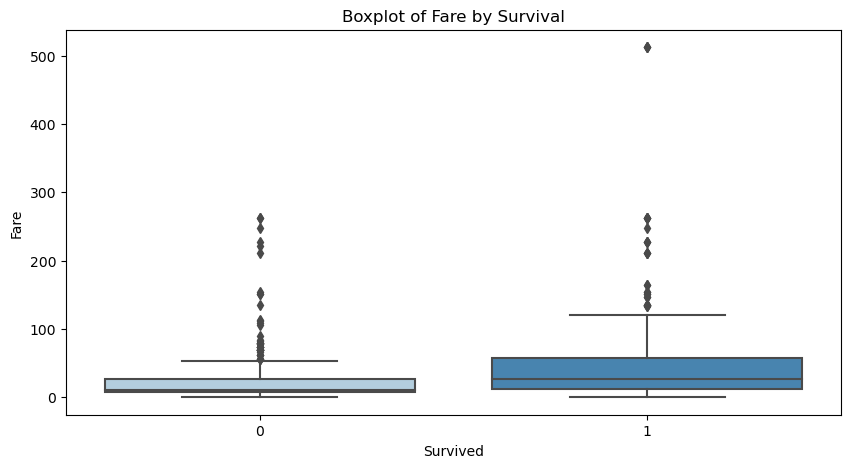

In [30]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(data=num_cols_df,x="Survived",y="Fare",palette="Blues")
plt.title("Boxplot of Fare by Survival")
plt.show()

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# add a constant term to your data
X = sm.add_constant(pass_df_final)

# calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

    VIF Factor            features
0   964.021695               const
1     1.812271            Survived
2     2.001296              Pclass
3   238.651157                 Sex
4     1.572152                 Age
5     1.690808                Fare
6     1.506266         Family Size
7     3.008200           Title_Col
8     2.019193           Title_Don
9     8.190497            Title_Dr
10    2.014086      Title_Jonkheer
11    3.189053          Title_Lady
12    3.011284         Title_Major
13   40.746922        Title_Master
14  319.968461          Title_Miss
15    5.415962          Title_Mlle
16    3.210648           Title_Mme
17  221.171418            Title_Mr
18  236.296309           Title_Mrs
19    3.192755            Title_Ms
20    7.009282           Title_Rev
21    2.016731           Title_Sir
22    3.190657  Title_the Countess
23    1.543513          Embarked_Q
24    1.514476          Embarked_S


In [32]:
pass_df_final.drop(["Title_Master", "Title_Miss", "Title_Mr","Title_Mrs","Title_Jonkheer","Title_Mlle","Title_Rev", 
"Title_Don","Title_Dr","Title_Lady","Title_Major","Title_Miss","Title_Mme","Title_Mrs","Title_Ms",
                   "Title_Sir","Title_the Countess","Title_Col","Title_Jonkheer"],axis=1,inplace = True)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# add a constant term to your data
X = sm.add_constant(pass_df_final)

# calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor     features
0   40.283415        const
1    1.658234     Survived
2    1.916556       Pclass
3    1.516593          Sex
4    1.254809          Age
5    1.647361         Fare
6    1.234969  Family Size
7    1.487899   Embarked_Q
8    1.468638   Embarked_S


In [34]:
pass_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    int32  
 4   Fare         891 non-null    float64
 5   Family Size  891 non-null    int64  
 6   Embarked_Q   891 non-null    uint8  
 7   Embarked_S   891 non-null    uint8  
dtypes: float64(1), int32(1), int64(4), uint8(2)
memory usage: 40.2 KB


### Logistic regression model

In [55]:
# Split the data into training and testing sets
X = pass_df_final.drop(['Survived'], axis=1)
y = pass_df_final['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [56]:
const1 = sm.add_constant(X_train) 
model1 = sm.Logit(y_train, const1)
result1 = model1.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.437335
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Mon, 24 Apr 2023   Pseudo R-squ.:                  0.3389
Time:                        02:16:00   Log-Likelihood:                -311.38
converged:                       True   LL-Null:                       -471.03
Covariance Type:            nonrobust   LLR p-value:                 4.549e-65
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6968      0.577      4.677      0.000       1.567       3.827
Pclass         -1.0973    

In [57]:
from sklearn.metrics import confusion_matrix
#building a confusion matrix
logistic_regression= LogisticRegression()
lr_model=logistic_regression.fit(X_test,y_test)
lr_pred = lr_model.predict(X_test)
cf_matrix = confusion_matrix(y_test,lr_pred)
cf_matrix

array([[89, 15],
       [21, 54]], dtype=int64)

<AxesSubplot:>

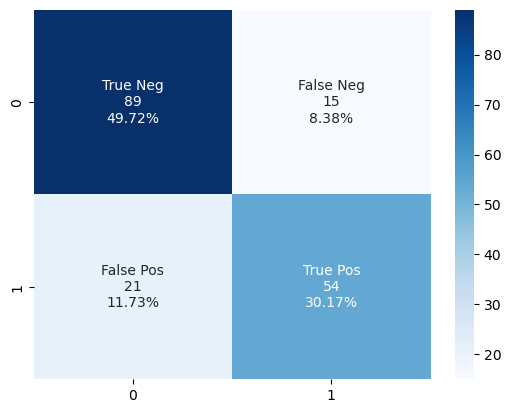

In [58]:
group_names = ['True Neg','False Neg','False Pos','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [59]:
 #classififcation report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       104
           1       0.78      0.72      0.75        75

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [60]:
#Logistic regression model accuracy
lr_model.score(X_test,y_test)

0.7988826815642458

### Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=100,max_depth=4)   
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=100)

In [64]:
#Accuracy
yrf_predict = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,yrf_predict)

0.8212290502793296

In [65]:
cnf2_matrix = confusion_matrix(y_test,yrf_predict)
cnf2_matrix

array([[98,  6],
       [26, 49]], dtype=int64)

<AxesSubplot:>

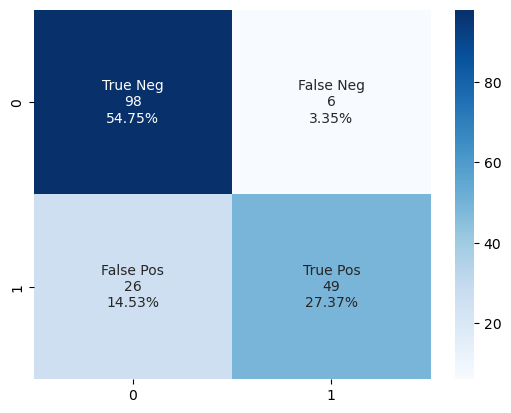

In [66]:
group_names = ['True Neg','False Neg','False Pos','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf2_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf2_matrix.flatten()/np.sum(cnf2_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf2_matrix, annot=labels, fmt='', cmap='Blues')

In [67]:
#classification report
print(classification_report(y_test, yrf_predict))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       104
           1       0.89      0.65      0.75        75

    accuracy                           0.82       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.82      0.82       179



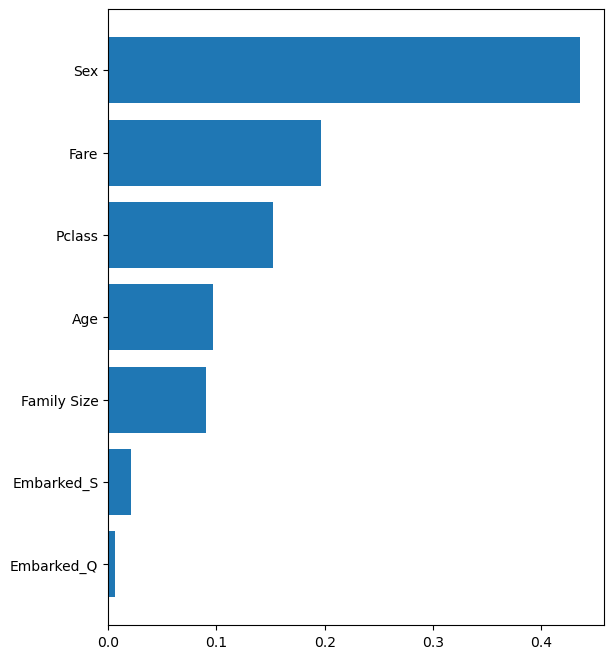

In [68]:
#Feature Importance
importances = rf_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(6.4, 8))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])